In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ML_utils import load_data,load_data_test_set, total_day_eve_night_grouping
df =pd.read_csv('train.csv')

### UNCOMMENT THIS PART TO GROUP FEATURES
feature_engineering = True
df=total_day_eve_night_grouping(df,grouping=feature_engineering)
exclude_list = ['state','area_code']

one_hot_on = True
normalize_on = True
oversample_on=False


###################
#### LOAD DATA ####

X_train,y_train,X_val,y_val,X_test,y_test,columns = load_data(df,exclude=exclude_list,one_hot=one_hot_on,normalize_=normalize_on,oversample=oversample_on)


X_train.shape



(2975, 11)

In [40]:
from ML_logistic_utils import grid_search,predict,accuracy

In [41]:
### HYPERPARAMETER TUNING

lr_value=[0.01,0.05,0.1]
reg_value=[0.01,0.05,0.1]
epoch_value=[15000]
threshold_value=[0.5]





### REPEATING THE SAME PROCESS FOR REGULARIZATION AND EPOCHS


results=grid_search(X_train,y_train,X_val,y_val,lr_value,reg_value,epoch_value,threshold_value)


print('Best lr:',results['lr'])
print('Best reg:',results['reg'])
print('Best epoch:',results['epoch'])
print('Best threshold:',results['threshold'])
print('Best accuracy:',results['accuracy'])





Epoch 0: 1.1398942557023417
Epoch 1000: 0.3416404049108853
Epoch 2000: 0.3140384992064353
Epoch 3000: 0.3088207902897058
Epoch 4000: 0.3071494664894444
Epoch 5000: 0.30649261177655274
Epoch 6000: 0.3061917859488822
Epoch 7000: 0.3060304629939336
Epoch 8000: 0.30592837824257374
Epoch 9000: 0.3058535060496795
Epoch 10000: 0.30579237618207666
Epoch 11000: 0.30573905254637723
Epoch 12000: 0.30569077855269594
Epoch 13000: 0.30564618318902875
Epoch 14000: 0.30560451975543446
Epoch 0: 1.336884618715625
Epoch 1000: 0.34342653187004535
Epoch 2000: 0.3139119740745895
Epoch 3000: 0.30892532044579585
Epoch 4000: 0.3072457431262416
Epoch 5000: 0.30651741736696214
Epoch 6000: 0.3061387715722861
Epoch 7000: 0.3059086659328056
Epoch 8000: 0.30575013568962267
Epoch 9000: 0.3056307539862194
Epoch 10000: 0.3055355720357261
Epoch 11000: 0.30545698398175714
Epoch 12000: 0.30539067451439
Epoch 13000: 0.30533391549159283
Epoch 14000: 0.3052848159486274
Epoch 0: 1.0848730763267023
Epoch 1000: 0.33519990487964

Threshold: 0.1, F1 Score: 0.42777777777777776
Threshold: 0.2, F1 Score: 0.5414847161572053
Threshold: 0.30000000000000004, F1 Score: 0.44970414201183434
Threshold: 0.4, F1 Score: 0.35714285714285715
Threshold: 0.5, F1 Score: 0.3220338983050847
Threshold: 0.6, F1 Score: 0.2222222222222222
Threshold: 0.7000000000000001, F1 Score: 0.15841584158415845
Threshold: 0.8, F1 Score: 0.10309278350515463
Threshold: 0.9, F1 Score: 0.02173913043478261


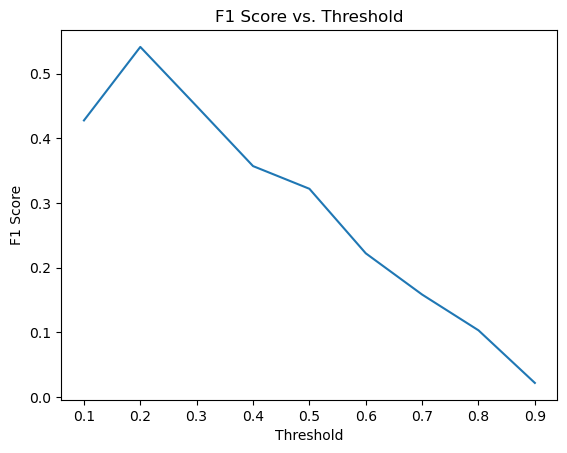

In [42]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
import numpy as np
# Define thresholds
thresholds = np.arange(0.1, 1.0, 0.1)


W=results['W']
b=results['b']
default_threshold=results['threshold']


# Predict on test set
y_pred = predict(X_test, W, b, threshold=default_threshold)

y_pred=y_pred.astype(int)
y_test=y_test.astype(int)
# Initialize list to store F1 scores
f1_scores = []
best_threshold=0
best_f1=0
# Loop over thresholds
for threshold in thresholds:
    # Predict on test set
    y_pred = predict(X_test, W, b, threshold=threshold)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    if f1>best_f1:
        best_threshold=threshold
        best_f1=f1
    # Append F1 score to list
    f1_scores.append(f1)

# Print F1 scores
for threshold, f1 in zip(thresholds, f1_scores):
    print(f'Threshold: {threshold}, F1 Score: {f1}')
    
# Plot F1 scores
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.show()


Model 1:
Model parameters:{'W': array([[ 0.02192798],
       [ 0.57761154],
       [-0.52555818],
       [-0.04798595],
       [ 0.12203725],
       [-0.18791114],
       [ 0.12609403],
       [ 0.66046657],
       [-0.02931589],
       [ 0.90167517],
       [-0.1102912 ]]), 'b': array([-2.42760596]), 'lr': 0.01, 'reg': 0.01, 'epoch': 15000, 'threshold': 0.5}


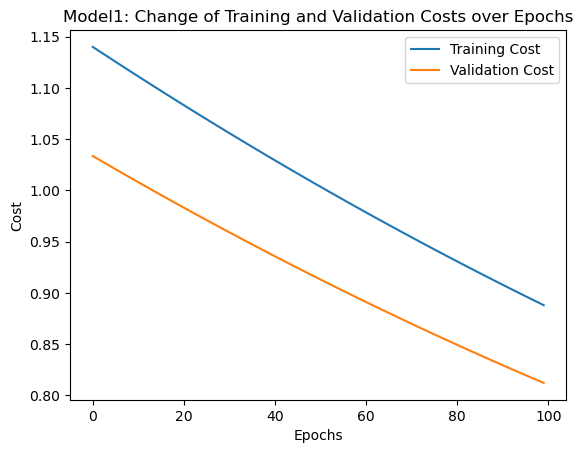

Model 2:
Model parameters:{'W': array([[ 0.02164678],
       [ 0.57582544],
       [-0.71038072],
       [ 0.13699924],
       [ 0.05315262],
       [-0.18885024],
       [ 0.19398311],
       [ 0.65820409],
       [-0.02886395],
       [ 0.83698688],
       [-0.04677742]]), 'b': array([-2.42456281]), 'lr': 0.01, 'reg': 0.05, 'epoch': 15000, 'threshold': 0.5}


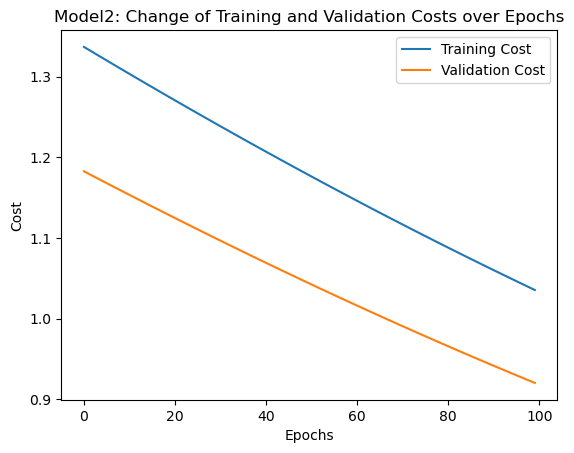

Model 3:
Model parameters:{'W': array([[ 0.021767  ],
       [ 0.57590405],
       [-0.61146966],
       [ 0.03954431],
       [-0.30404855],
       [-0.18817938],
       [ 0.55055971],
       [ 0.65816776],
       [-0.02900452],
       [ 0.82119541],
       [-0.03136706]]), 'b': array([-2.42099838]), 'lr': 0.01, 'reg': 0.1, 'epoch': 15000, 'threshold': 0.5}


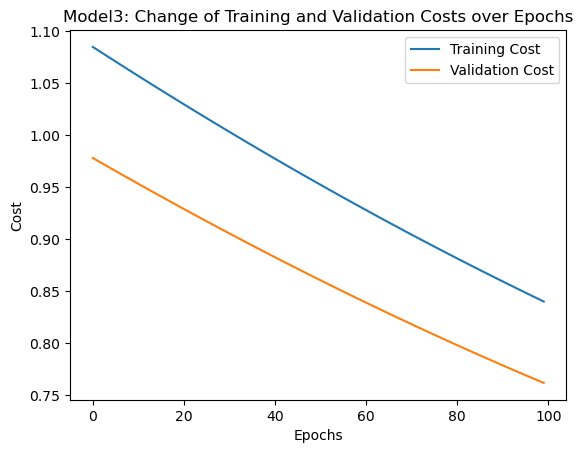

Model 4:
Model parameters:{'W': array([[ 0.02141354],
       [ 0.57752173],
       [-1.00333957],
       [ 0.41792481],
       [-0.19449745],
       [-0.19155488],
       [ 0.44516828],
       [ 0.66138612],
       [-0.02845315],
       [ 0.94291541],
       [-0.14872889]]), 'b': array([-2.44791598]), 'lr': 0.05, 'reg': 0.01, 'epoch': 15000, 'threshold': 0.5}


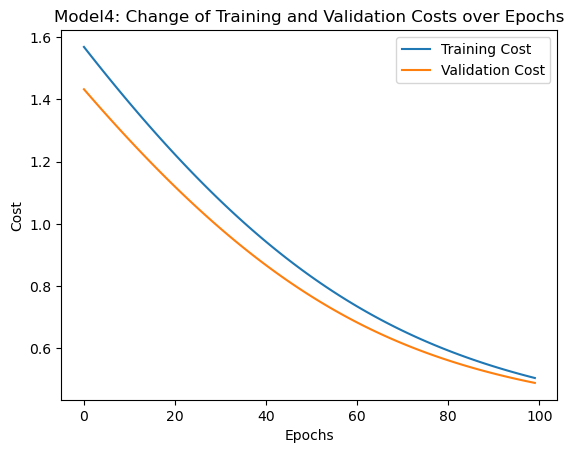

Model 5:
Model parameters:{'W': array([[ 0.02145921],
       [ 0.57751845],
       [-0.96117432],
       [ 0.37757916],
       [ 0.47798263],
       [-0.19113422],
       [-0.22743748],
       [ 0.66123333],
       [-0.02855393],
       [ 0.94226746],
       [-0.14835633]]), 'b': array([-2.44591564]), 'lr': 0.05, 'reg': 0.05, 'epoch': 15000, 'threshold': 0.5}


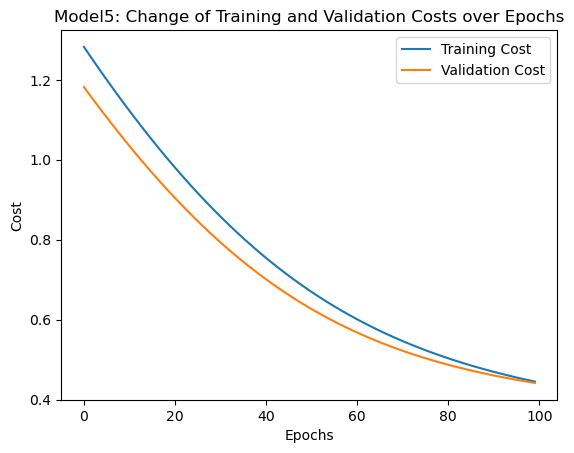

Model 6:
Model parameters:{'W': array([[ 0.02140435],
       [ 0.5773296 ],
       [-1.01766152],
       [ 0.4318728 ],
       [ 0.03450556],
       [-0.19152056],
       [ 0.21613026],
       [ 0.66111608],
       [-0.02841831],
       [ 0.94122461],
       [-0.14722081]]), 'b': array([-2.44811608]), 'lr': 0.05, 'reg': 0.1, 'epoch': 15000, 'threshold': 0.5}


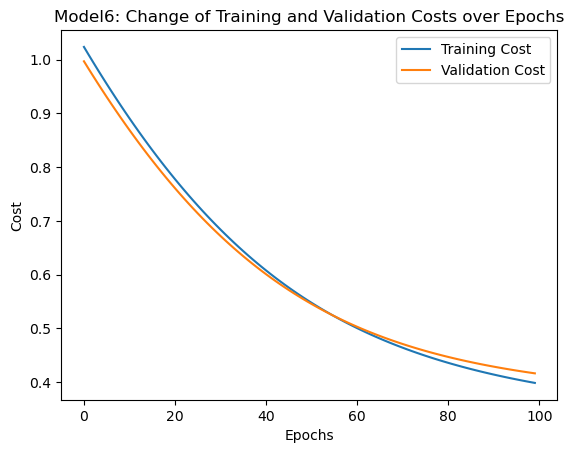

Model 7:
Model parameters:{'W': array([[ 0.02130428],
       [ 0.57746641],
       [-1.17701475],
       [ 0.58308276],
       [ 0.4958036 ],
       [-0.19254861],
       [-0.24437297],
       [ 0.66164497],
       [-0.02813672],
       [ 0.94335443],
       [-0.14816969]]), 'b': array([-2.45652053]), 'lr': 0.1, 'reg': 0.01, 'epoch': 15000, 'threshold': 0.5}


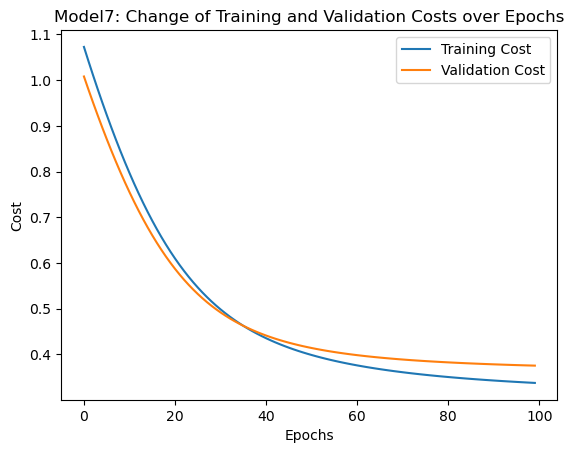

Model 8:
Model parameters:{'W': array([[ 0.02129003],
       [ 0.57738538],
       [-1.1970531 ],
       [ 0.60207804],
       [ 0.48260985],
       [-0.1926359 ],
       [-0.2311468 ],
       [ 0.66157267],
       [-0.02809258],
       [ 0.94256912],
       [-0.14736934]]), 'b': array([-2.45742881]), 'lr': 0.1, 'reg': 0.05, 'epoch': 15000, 'threshold': 0.5}


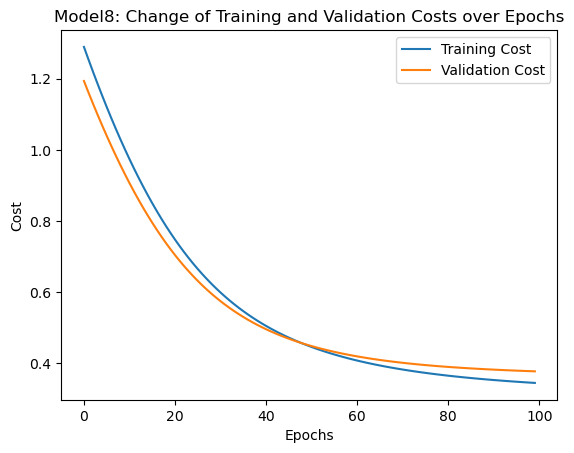

Model 9:
Model parameters:{'W': array([[ 0.0212858 ],
       [ 0.57725362],
       [-1.1787438 ],
       [ 0.58490797],
       [-0.22316056],
       [-0.19258545],
       [ 0.47440873],
       [ 0.66139163],
       [-0.02809711],
       [ 0.94156778],
       [-0.1466548 ]]), 'b': array([-2.45619188]), 'lr': 0.1, 'reg': 0.1, 'epoch': 15000, 'threshold': 0.5}


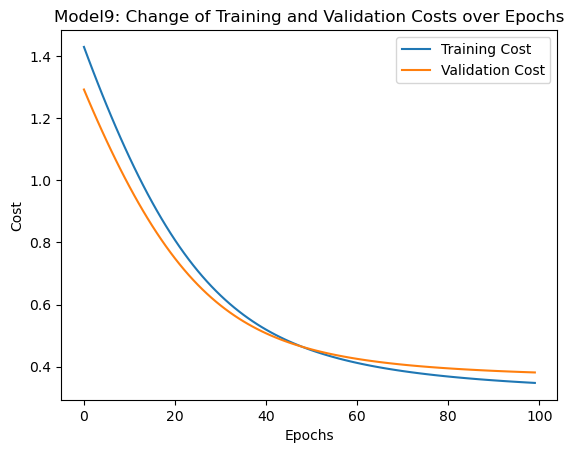

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Define the lists of training and validation costs
for i in range(len(results['cost_train'])):
    print(f"Model {i+1}:")
    print(f"Model parameters:{results['model_parameters'][i]}")
    train_costs = results['cost_train'][i]
    val_costs = results['cost_valid'][i]

    # Reshape the arrays to have the same first dimension
    train_costs = np.reshape(train_costs, (-1,))
    val_costs = np.reshape(val_costs, (-1,))

    # Create the x-axis values (epochs) in the interval of 5000
    epoch_range_start=0
    epoch_range_end=100
    epochs = range(epoch_range_start, epoch_range_end, 1)

    # Plot the training and validation costs
    plt.plot(epochs, train_costs[epoch_range_start:epoch_range_end], label='Training Cost')
    plt.plot(epochs, val_costs[epoch_range_start:epoch_range_end], label='Validation Cost')

    # Add labels and title to the plot
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title(f'Model{i+1}: Change of Training and Validation Costs over Epochs')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

Model 1:
Model parameters:{'W': array([[ 0.02192798],
       [ 0.57761154],
       [-0.52555818],
       [-0.04798595],
       [ 0.12203725],
       [-0.18791114],
       [ 0.12609403],
       [ 0.66046657],
       [-0.02931589],
       [ 0.90167517],
       [-0.1102912 ]]), 'b': array([-2.42760596]), 'lr': 0.01, 'reg': 0.01, 'epoch': 15000, 'threshold': 0.5}


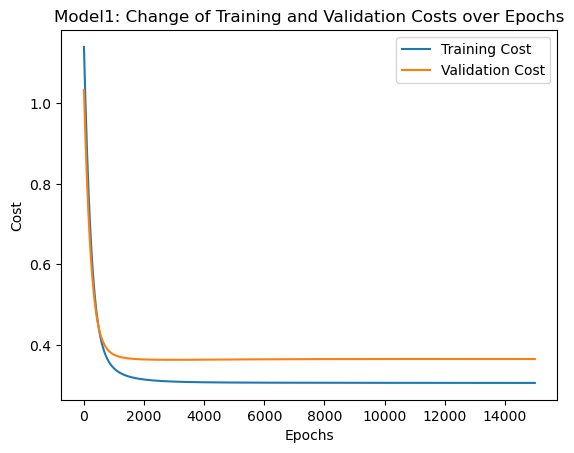

Model 2:
Model parameters:{'W': array([[ 0.02164678],
       [ 0.57582544],
       [-0.71038072],
       [ 0.13699924],
       [ 0.05315262],
       [-0.18885024],
       [ 0.19398311],
       [ 0.65820409],
       [-0.02886395],
       [ 0.83698688],
       [-0.04677742]]), 'b': array([-2.42456281]), 'lr': 0.01, 'reg': 0.05, 'epoch': 15000, 'threshold': 0.5}


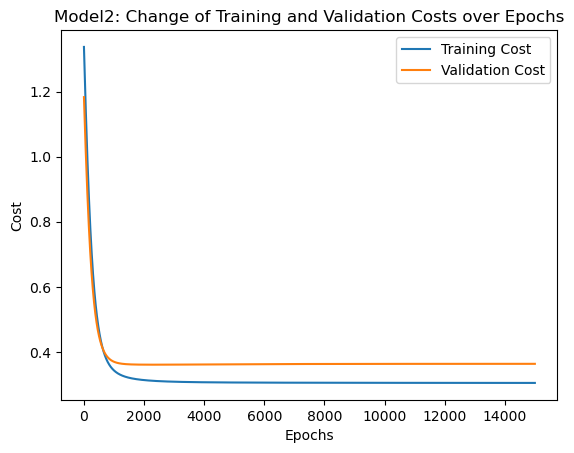

Model 3:
Model parameters:{'W': array([[ 0.021767  ],
       [ 0.57590405],
       [-0.61146966],
       [ 0.03954431],
       [-0.30404855],
       [-0.18817938],
       [ 0.55055971],
       [ 0.65816776],
       [-0.02900452],
       [ 0.82119541],
       [-0.03136706]]), 'b': array([-2.42099838]), 'lr': 0.01, 'reg': 0.1, 'epoch': 15000, 'threshold': 0.5}


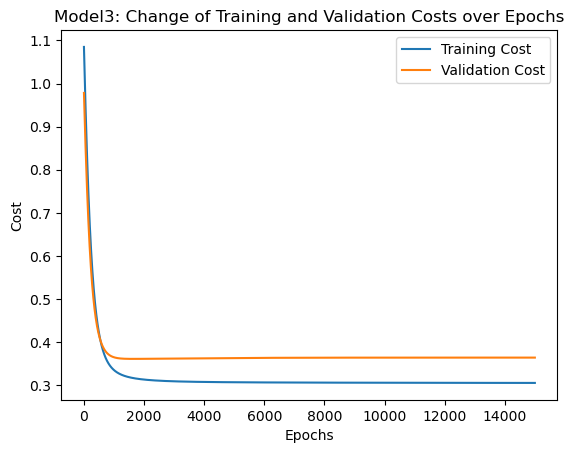

Model 4:
Model parameters:{'W': array([[ 0.02141354],
       [ 0.57752173],
       [-1.00333957],
       [ 0.41792481],
       [-0.19449745],
       [-0.19155488],
       [ 0.44516828],
       [ 0.66138612],
       [-0.02845315],
       [ 0.94291541],
       [-0.14872889]]), 'b': array([-2.44791598]), 'lr': 0.05, 'reg': 0.01, 'epoch': 15000, 'threshold': 0.5}


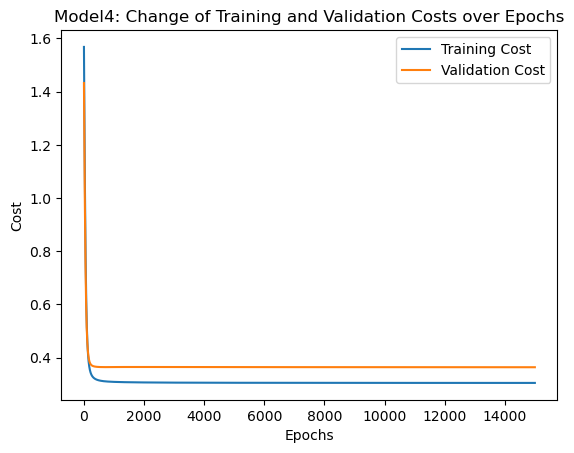

Model 5:
Model parameters:{'W': array([[ 0.02145921],
       [ 0.57751845],
       [-0.96117432],
       [ 0.37757916],
       [ 0.47798263],
       [-0.19113422],
       [-0.22743748],
       [ 0.66123333],
       [-0.02855393],
       [ 0.94226746],
       [-0.14835633]]), 'b': array([-2.44591564]), 'lr': 0.05, 'reg': 0.05, 'epoch': 15000, 'threshold': 0.5}


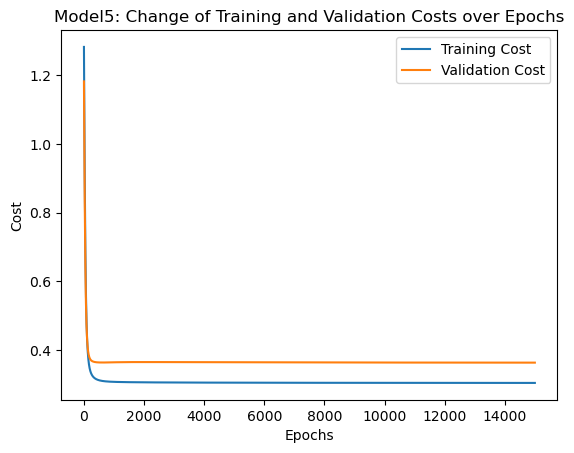

Model 6:
Model parameters:{'W': array([[ 0.02140435],
       [ 0.5773296 ],
       [-1.01766152],
       [ 0.4318728 ],
       [ 0.03450556],
       [-0.19152056],
       [ 0.21613026],
       [ 0.66111608],
       [-0.02841831],
       [ 0.94122461],
       [-0.14722081]]), 'b': array([-2.44811608]), 'lr': 0.05, 'reg': 0.1, 'epoch': 15000, 'threshold': 0.5}


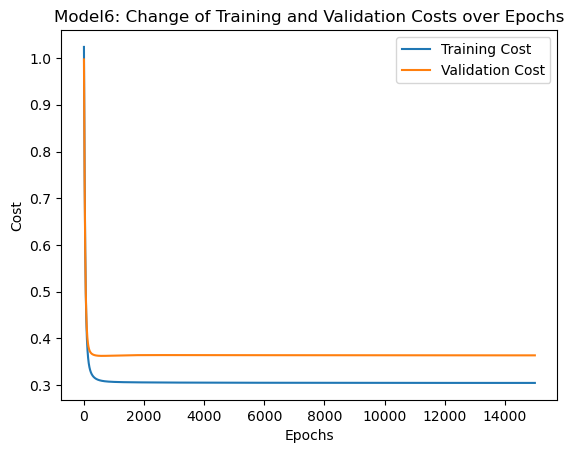

Model 7:
Model parameters:{'W': array([[ 0.02130428],
       [ 0.57746641],
       [-1.17701475],
       [ 0.58308276],
       [ 0.4958036 ],
       [-0.19254861],
       [-0.24437297],
       [ 0.66164497],
       [-0.02813672],
       [ 0.94335443],
       [-0.14816969]]), 'b': array([-2.45652053]), 'lr': 0.1, 'reg': 0.01, 'epoch': 15000, 'threshold': 0.5}


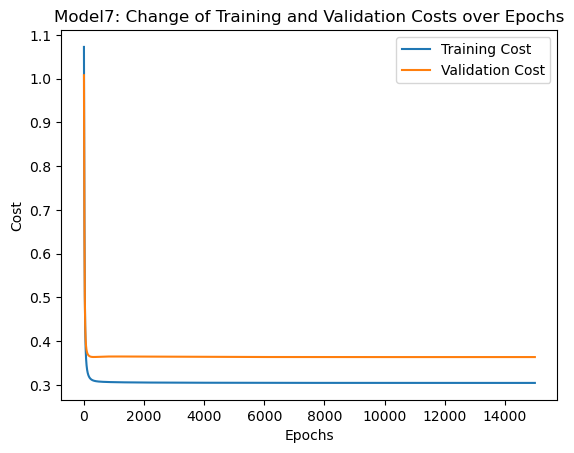

Model 8:
Model parameters:{'W': array([[ 0.02129003],
       [ 0.57738538],
       [-1.1970531 ],
       [ 0.60207804],
       [ 0.48260985],
       [-0.1926359 ],
       [-0.2311468 ],
       [ 0.66157267],
       [-0.02809258],
       [ 0.94256912],
       [-0.14736934]]), 'b': array([-2.45742881]), 'lr': 0.1, 'reg': 0.05, 'epoch': 15000, 'threshold': 0.5}


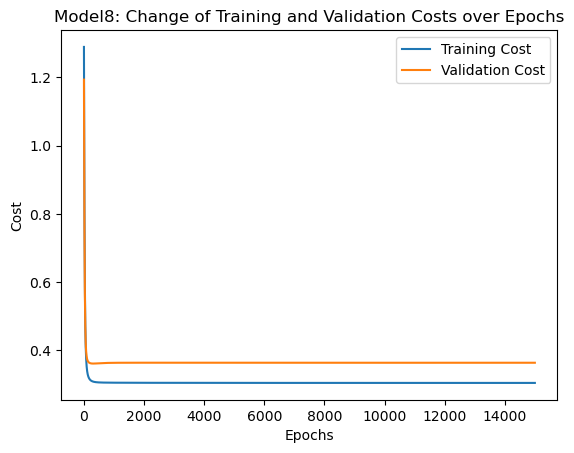

Model 9:
Model parameters:{'W': array([[ 0.0212858 ],
       [ 0.57725362],
       [-1.1787438 ],
       [ 0.58490797],
       [-0.22316056],
       [-0.19258545],
       [ 0.47440873],
       [ 0.66139163],
       [-0.02809711],
       [ 0.94156778],
       [-0.1466548 ]]), 'b': array([-2.45619188]), 'lr': 0.1, 'reg': 0.1, 'epoch': 15000, 'threshold': 0.5}


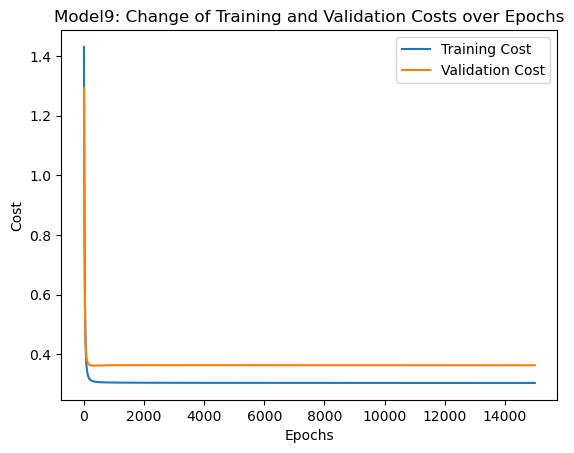

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define the lists of training and validation costs
for i in range(len(results['cost_train'])):
    print(f"Model {i+1}:")
    print(f"Model parameters:{results['model_parameters'][i]}")
    train_costs = results['cost_train'][i]
    val_costs = results['cost_valid'][i]
    # Reshape the arrays to have the same first dimension
    train_costs = np.reshape(train_costs, (-1,))
    val_costs = np.reshape(val_costs, (-1,))

    # Create the x-axis values (epochs) in the interval of 5000
    epoch_range=results['epoch']
    epochs = range(epoch_range)

    # Plot the training and validation costs
    plt.plot(epochs, train_costs[:epoch_range], label='Training Cost')
    plt.plot(epochs, val_costs[:epoch_range], label='Validation Cost')

    # Add labels and title to the plot
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title(f'Model{i+1}: Change of Training and Validation Costs over Epochs')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

Threshold: 0.5
F1 score for y_test with W,b: 0.3220338983050847
Threshold: 0.6
F1 score for y_test with W,b: 0.2222222222222222
Threshold: 0.7
F1 score for y_test with W,b: 0.15841584158415845
Threshold: 0.8
F1 score for y_test with W,b: 0.10309278350515463
Threshold: 0.9
F1 score for y_test with W,b: 0.02173913043478261


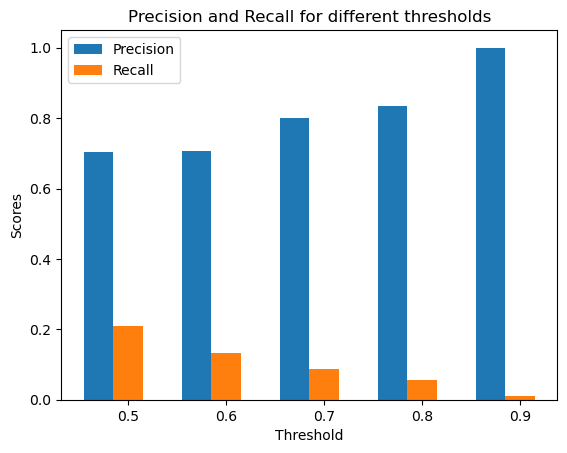

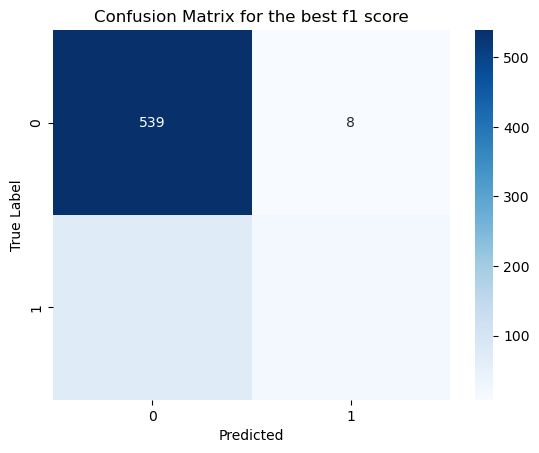

[[539   8]
 [ 72  19]]
Best threshold: 0.5


In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score


precision_scores = []
recall_scores = []

best_f1=-1
threshold_list = [0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in threshold_list:
    y_pred = predict(X_test, W, b, threshold=threshold)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Threshold: {threshold}")

    print(f"F1 score for y_test with W,b: {f1_score(y_test, y_pred)}")
    if f1_score(y_test, y_pred) > best_f1:
        best_f1 = f1_score(y_test, y_pred)
        best_threshold = threshold
        best_y_pred = y_pred
        best_cm = cm
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)
    
x = np.arange(len(threshold_list))

# Plot bars

plt.bar(x - 0.3, precision_scores, 0.3, label='Precision')
plt.bar(x, recall_scores, 0.3, label='Recall')


plt.xticks(x, threshold_list)
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.title('Precision and Recall for different thresholds')
plt.legend()

plt.show()

# Plot the confusion matrix using seaborn
sns.heatmap(best_cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix for the best f1 score')
plt.show()
print(best_cm)
print(f"Best threshold: {best_threshold}")


In [46]:
from sklearn.metrics import accuracy_score

y_pred = predict(X_val, W, b, threshold=best_threshold)

print(accuracy(y_val, y_pred))

0.8383045525902669


In [47]:
### USE THE MODEL ON THE TEST SET
df_test=pd.read_csv('test.csv')

df_test=total_day_eve_night_grouping(df_test,grouping=feature_engineering)


X_test_output=load_data_test_set(df_test,exclude=exclude_list+['id'],one_hot=one_hot_on,normalize_=normalize_on)

y_pred_output=predict(X_test_output,W,b,threshold=best_threshold)

y_pred_output=np.where(y_pred_output>best_threshold, 'yes', 'no')
y_pred_output=y_pred_output.reshape(-1,)
id_column = np.arange(1, y_pred_output.shape[0] + 1)


# Create a DataFrame
df_output = pd.DataFrame({
    'id': id_column,
    'churn': y_pred_output
})


# Save the DataFrame as a CSV file
df_output.to_csv('output_logistic.csv', index=False)